## Codio Activity 2.4: Measures of Center and Spread with `pandas`

**Expected Time: 60 Minutes**

**Total Points: 20**

Measures of central tendency for datasets are typically mean, median, mode, variance, and standard deviation. We will explore mode in later modules. This assignment focuses on using pandas to compute numerical summaries of data. You will load in a dataset and compute the mean, median, variance, and standard deviation of numeric features in the data. You will also examine the spread of the data using quartiles and the interquartile range, also identifying outliers using the  1.5×𝐼𝑄𝑅  rule.


## Index:

- [Problem 1](#Problem-1:-Load-the-Data)
- [Problem 2](#Problem-2:-Base-Salary-Distribution-Mean)
- [Problem 3](#Problem-3:-Base-Salary-Distribution-Median)
- [Problem 4](#Problem-4:-Determining-Quartiles)
- [Problem 5](#Problem-5:-Interquartile-Range)
- [Problem 6](#Problem-6:-Rule-for-Outliers)
- [Problem 7](#Problem-7:-Dropping-Outliers)
- [Problem 8](#Finding-the-Mean-with-no-Outliers)
- [Problem 9]()
- [Problem 10](#Standard-Deviation-with-`numpy`)
- [Problem 11](#Standard-Deviation-with-`pandas`)
- [Problem 12]()
- [Problem 13](#Measure-of-Spread)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### The Data


![](images/payroll.png)
The dataset for this assignment comes from New York City's Open Data, and contains information about the citywide payroll data.  Below, you are to load the data from a `.csv` file.  

[Back to top](#Index:) 

### Problem 1:  Load the Data

**1 Point**

Below, load the data file located in the `data` folder named `nyc_salaries.csv`.  Assign your DataFrame to `nyc_salary_data`.

In [2]:
###GRADED

nyc_salary_data = ''

###BEGIN SOLUTION
nyc_salary_data = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/codio_2.4_solution/data/nyc_salaries.csv')
###END SOLUTION

In [3]:
###BEGIN HIDDEN TESTS
nyc_salary_data_ = pd.read_csv('data/nyc_salaries.csv')

pd.testing.assert_frame_equal(nyc_salary_data.head(), nyc_salary_data_.head())
###END HIDDEN TESTS

### Examine the Data

Now that the data is loaded, information about the datatypes and missing values as well as a quick look at the first five rows of the data can be had with the `.info()` and `.head()` methods.

In [3]:
nyc_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590210 entries, 0 to 590209
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fiscal_year                 590210 non-null  int64  
 1   payroll_number              590210 non-null  int64  
 2   agency_name                 590210 non-null  object 
 3   last_name                   589838 non-null  object 
 4   first_name                  589835 non-null  object 
 5   agency_start_date           590147 non-null  object 
 6   work_location_borough       590207 non-null  object 
 7   title_description           590204 non-null  object 
 8   leave_status_as_of_july_31  590210 non-null  object 
 9   base_salary                 590210 non-null  float64
 10  pay_basis                   590210 non-null  object 
 11  regular_hours               590210 non-null  float64
 12  regular_gross_paid          590210 non-null  float64
 13  ot_hours      

In [5]:
nyc_salary_data.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,2015-08-10T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,NaN
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,2016-09-12T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,M
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,2016-02-22T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,NaN
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,2013-09-16T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,D
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,2018-04-30T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,P


[Back to top](#Index:) 

### Problem 2: Base Salary Distribution Mean

**1 Point**

Use pandas to determine the mean of the `base_salary` column.  Assign your answer to the variable `ans_2` below.

<AxesSubplot:>

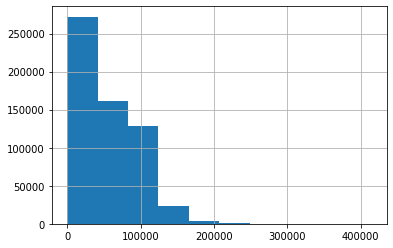

In [6]:
nyc_salary_data['base_salary'].hist()

In [4]:
###GRADED

ans_2 = ''

###BEGIN SOLUTION
ans_2 = nyc_salary_data['base_salary'].mean()
###END SOLUTION

In [8]:
###BEGIN HIDDEN TESTS
ans_2_ = nyc_salary_data_['base_salary'].mean()
assert ans_2 == ans_2_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 3: Base Salary Distribution Median


**1 Point**


Use the pandas `.median()` method to find the median of the `base_salary` column. Assign your answer to the variable `ans_3` below.

In [5]:
###GRADED

ans_3 = ''

###BEGIN SOLUTION
ans_3 = nyc_salary_data['base_salary'].median()
###END SOLUTION

In [10]:
###BEGIN HIDDEN TESTS
ans_3_ = nyc_salary_data_['base_salary'].median()
assert ans_3_ == ans_3
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 4: Determining Quartiles

**2 Points**

- The first quartile in our data is found by arranging the data from least to greatest and determining the median of the lower half of the data.  
- The third quartile is the median of the upper half of the data.  
- Pandas has a `.quantile()` method that accepts an argument as a single value or list of values of quantiles to compute.  
- Use the `.quantile()` method to determine the first and third quartile of the `base_salary` data.  
- Assign your answers to the variables `first_quartile` and `third_quartile` below.

In [6]:
###GRADED

first_quartile = ''
third_quartile = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
###END SOLUTION

In [12]:
###BEGIN HIDDEN TESTS
first_quartile_ = nyc_salary_data_['base_salary'].quantile(.25)
third_quartile_ = nyc_salary_data_['base_salary'].quantile(.75)
assert first_quartile == first_quartile_
assert third_quartile == third_quartile_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 5: Interquartile Range

**1 Point**

The Interquartile Range (IQR) is the distance between the third and first quartile.  

$$\text{IQR} = Q_3 - Q_1$$

Use your work from problem 4 to determine the IQR for the `base_salary` column and assign it to the `iqr` variable below.

In [7]:
###GRADED

iqr = ''

###BEGIN SOLUTION
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
###END SOLUTION

In [14]:
###BEGIN HIDDEN TESTS
iqr_ = nyc_salary_data_['base_salary'].quantile(.75) - nyc_salary_data_['base_salary'].quantile(.25)
assert iqr == iqr_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 6: Rule for Outliers

**2 Points**

We can use the IQR to determine boundaries for outliers.  One such rule of thumb is that any values $1.5 \times IQR$ above the third quartile or below the first are considered outliers.  

Calculate the lower and upper boundaries for outliers for the `base_salary` column using the IQR rule.

Assign your solutions to the variables `lower` and `upper` below.

In [8]:
###GRADED

lower = ''
upper = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
###END SOLUTION

In [16]:
###BEGIN HIDDEN TESTS
first_quartile_ = nyc_salary_data_['base_salary'].quantile(.25)
third_quartile_ = nyc_salary_data_['base_salary'].quantile(.75)
iqr_ = nyc_salary_data_['base_salary'].quantile(.75) - nyc_salary_data_['base_salary'].quantile(.25)
lower_ = first_quartile_ - 1.5*iqr_
upper_ = third_quartile_ + 1.5*iqr_
assert lower == lower_
assert upper == upper_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 7: Dropping Outliers


**1 Point**


With the upper and lower boundaries in place, we want to drop outliers from the dataset.  Use pandas to limit the data based on outliers using the $1.5 \times IQR$ rule on the `base_salary` column.  Assign the resulting DataFrame to `salaries_no_outlier` below.

In [9]:
###GRADED

salaries_no_outlier = ''

###BEGIN SOLUTION
first_quartile = nyc_salary_data['base_salary'].quantile(.25)
third_quartile = nyc_salary_data['base_salary'].quantile(.75)
iqr = nyc_salary_data['base_salary'].quantile(.75) - nyc_salary_data['base_salary'].quantile(.25)
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
salaries_no_outlier = nyc_salary_data.loc[(nyc_salary_data['base_salary']>lower) & (nyc_salary_data['base_salary']<upper)]

###END SOLUTION

In [18]:
###BEGIN HIDDEN TESTS
first_quartile_ = nyc_salary_data_['base_salary'].quantile(.25)
third_quartile_ = nyc_salary_data_['base_salary'].quantile(.75)
iqr_ = nyc_salary_data_['base_salary'].quantile(.75) - nyc_salary_data_['base_salary'].quantile(.25)
lower_ = first_quartile_ - 1.5*iqr_
upper_ = third_quartile_ + 1.5*iqr_
salaries_no_outlier_ = nyc_salary_data_.loc[(nyc_salary_data_['base_salary']>lower) & (nyc_salary_data_['base_salary']<upper)]
pd.testing.assert_frame_equal(salaries_no_outlier_.head(), salaries_no_outlier.head())
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 8: Finding the Mean with no Outliers

**1 Point**

Now that the outliers have been removed, we determine the mean of the `base_salary` column.  Assign your answer to `mean_no_outliers` below.

In [19]:
###GRADED

mean_no_outliers = ''

###BEGIN SOLUTION
mean_no_outliers = salaries_no_outlier['base_salary'].mean()
###END SOLUTION

In [20]:
###BEGIN HIDDEN TESTS
first_quartile_ = nyc_salary_data_['base_salary'].quantile(.25)
third_quartile_ = nyc_salary_data_['base_salary'].quantile(.75)
iqr_ = nyc_salary_data_['base_salary'].quantile(.75) - nyc_salary_data_['base_salary'].quantile(.25)
lower_ = first_quartile_ - iqr_
upper_ = third_quartile_ + iqr_
salaries_no_outlier_ = nyc_salary_data_.loc[(nyc_salary_data_['base_salary']>(first_quartile_ - 1.5*iqr_)) & (nyc_salary_data_['base_salary']<(third_quartile_ + 1.5*iqr_))]
mean_no_outliers_ = salaries_no_outlier_['base_salary'].mean()
assert mean_no_outliers == mean_no_outliers_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 9: Finding the Median with no Outliers

**2 Points**


Now, determine the median of the `base_salary` column with the outlier removed.  Assign your solution to the variable `median_no_outliers` below.

In [21]:
###GRADED

median_no_outliers = ''

###BEGIN SOLUTION
median_no_outliers = salaries_no_outlier['base_salary'].median()
###END SOLUTION

In [22]:
###BEGIN HIDDEN TESTS
first_quartile_ = nyc_salary_data_['base_salary'].quantile(.25)
third_quartile_ = nyc_salary_data_['base_salary'].quantile(.75)
iqr_ = nyc_salary_data_['base_salary'].quantile(.75) - nyc_salary_data_['base_salary'].quantile(.25)
lower_ = first_quartile_ - iqr_
upper_ = third_quartile_ + iqr_
salaries_no_outlier_ = nyc_salary_data_.loc[(nyc_salary_data_['base_salary']>(first_quartile_ - 1.5*iqr_)) & (nyc_salary_data_['base_salary']<(third_quartile_ + 1.5*iqr_))]
median_no_outliers_ = salaries_no_outlier_['base_salary'].median()

assert median_no_outliers == median_no_outliers_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 10: Standard Deviation with `numpy`

**2 Points**


An alternative measure for the spread of a dataset to the IQR is the **standard deviation**.  Both pandas and numpy have functions for computing the standard deviation, however they have different assumptions about the data.  To begin, we will use the `np.std()` method to determine the standard deviation of the `base_salary` column from both our datasets.  Assign your results to the variable `std_numpy_outliers` and `std_numpy_no_outliers` below.

In [23]:
###GRADED

std_numpy_outliers = ''
std_numpy_no_outliers = ''

###BEGIN SOLUTION
std_numpy_outliers = np.std(nyc_salary_data['base_salary'])
std_numpy_no_outliers = np.std(salaries_no_outlier['base_salary'])
###END SOLUTION

In [24]:
###BEGIN HIDDEN TESTS
std_numpy_outliers_ = np.std(nyc_salary_data_['base_salary'])
std_numpy_no_outliers_ = np.std(salaries_no_outlier_['base_salary'])

assert std_numpy_no_outliers == std_numpy_no_outliers_
assert std_numpy_outliers == std_numpy_outliers_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 11: Standard Deviation with `pandas`

**2 Points**



Now, we will use pandas to determine the standard deviation of the `base_salary` column.  Assign the standard deviation from pandas to `std_pandas_no_outliers` and `std_pandas_outliers` respectively below.

In [25]:
###GRADED

std_pandas_outliers = ''
std_pandas_no_outliers = ''

###BEGIN SOLUTION
std_pandas_outliers = nyc_salary_data['base_salary'].std()
std_pandas_no_outliers = salaries_no_outlier['base_salary'].std()
###END SOLUTION

In [26]:
###BEGIN HIDDEN TESTS
std_pandas_outliers_ = nyc_salary_data_['base_salary'].std()
std_pandas_no_outliers_ = salaries_no_outlier_['base_salary'].std()

assert std_pandas_no_outliers == std_pandas_no_outliers_
assert std_pandas_outliers == std_pandas_outliers_
###END HIDDEN TESTS

### Why are these different?

Pandas and NumPy make different assumptions about the data, which is why we receive slightly different results.  This involves the default degree of freedom argument in the functions.  From the numpy docs we have:

```
ddof: int, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
```

and from pandas we find:

```
ddof: int, default 1
Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.
```

The main reason for the different assumptions is motivated by the fact that all the deviations from the mean will add to zero.  This means we would always know the the last deviation if we know the previous $n-1$.  Only $n-1$ are able to vary freely so the average is determined by dividing the total by $n-1$.  In practice the values won't differ greatly, it is important to recognize that there are some different assumptions however.  

### A Second Small Example

The data below relates to salmon smolts (young salmon) and the reflectance of their skin as a measure for readiness for migration.

In [27]:
smolt = pd.read_csv('data/smolts.csv', index_col=  0)

In [28]:
smolt.head()

,Reflectance
ID,
1,57.62747
2,54.83248
3,63.44216
4,57.01707
5,54.71893


[Back to top](#Index:) 

### Problem 12: Measure of Center

**2 Points**


Determine the mean and median of the `Reflectance` column, save these to the variable `smolt_mean` and `smolt_median` below.  Which of the measures do you believe more appropriate?

In [29]:
###GRADED

smolt_mean = ''
smolt_median = ''

###BEGIN SOLUTION
smolt_mean = smolt['Reflectance'].mean()
smolt_median = smolt['Reflectance'].median()
###END SOLUTION

In [30]:
###BEGIN HIDDEN TESTS
smolt_ = pd.read_csv('data/smolts.csv', index_col=  0)
smolt_mean_ = smolt_['Reflectance'].mean()
smolt_median_ = smolt_['Reflectance'].median()

assert smolt_mean == smolt_mean_
assert smolt_median == smolt_median_
###END HIDDEN TESTS

[Back to top](#Index:) 

### Problem 13: Measure of Spread

**2 Points**

Compute the standard deviation and the quartiles of the `Reflectance` column using pandas. Save your results to `smolt_std`, `smolt_first_quartile` and `smolt_third_quartile` below.  Which of these do you prefer for describing the spread of the data?  

In [31]:
###GRADED

smolt_std = ''
smolt_first_quartile = ''
smolt_third_quartile = ''

###BEGIN SOLUTION
smolt_std = smolt['Reflectance'].std()
smolt_first_quartile = smolt['Reflectance'].quantile(.25)
smolt_third_quartile = smolt['Reflectance'].quantile(.75)
###END SOLUTION

In [32]:
###BEGIN HIDDEN TESTS
smolt_std_ = smolt_['Reflectance'].std()
smolt_first_quartile_ = smolt_['Reflectance'].quantile(.25)
smolt_third_quartile_ = smolt_['Reflectance'].quantile(.75)
assert smolt_std == smolt_std_
assert smolt_first_quartile == smolt_first_quartile_
assert smolt_third_quartile == smolt_third_quartile_
###END HIDDEN TESTS